## Modelling 

This note looks at fitting various models to the datasets.  

I am going fit the following classifiers on each of the dataseets (with PCA and without PCA):

* Logistic Regression
* Random Forest
* Support Vector Machine (classifier)
* K-Nearest Neighbours
* Naive Bayes
* Decision Tree

Having reconsidered the situation, I am now going to split the training datasets to get a validation set and leave the test sets for final model evaluation. I would probably want to split into three datasets from the start next time - I went back and updated the previous code.

### Import libraries and datasets

In [1]:
import pandas as pd

X_train_transformed = pd.read_csv('../../data/X_train_transformed.csv')
#X_test_transformed = pd.read_csv('../../data/X_test_transformed.csv')
X_val_transformed = pd.read_csv('../../data/X_val_transformed.csv')
X_train_pca = pd.read_csv('../../data/X_train_pca.csv')
#X_test_pca = pd.read_csv('../../data/X_test_pca.csv')
X_val_pca = pd.read_csv('../../data/X_val_pca.csv')


y_train = pd.read_csv('../../data/y_train.csv')
#y_test = pd.read_csv('../../data/y_test.csv')
y_val = pd.read_csv('../../data/y_val.csv')

In [110]:
print(len(X_train_transformed))
#print(len(X_test_transformed))
print(len(X_train_pca))
#print(len(X_test_pca))
print(len(y_train))
#print(len(y_test))

18861
6288
18861
6288
18861
6288


### Fitting Classifiers on multiclass outcome

First I will fit some classifiers on the multiclass outcome - that is 'final_result' as it exists in the dataset.  As mentioned elsewhere, I am also considering whether it is more appropriate to refactor the `final_result` into a binary outcome of `intervene` or `do_not_intervene` which may be more applicable to a real world situation for an institution.  

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# models
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

# iterate over the datasets
for dataset_name, X_train, X_val in [('X_train_transformed', X_train_transformed, X_val_transformed),
                                    ('X_train_pca', X_train_pca, X_val_pca)]:
    print(f"Results for {dataset_name}:")
    
    # iterate over the models
    for model in models:
        model_name = type(model).__name__
        print(f"Model: {model_name}")
        
        # fit model on the training data
        model.fit(X_train, y_train.values.ravel())  
        
        # predictions on the validation set
        y_pred_val = model.predict(X_val)
        
        # evaluation metrics on the validation set
        accuracy_val = accuracy_score(y_val, y_pred_val)
        precision_val = precision_score(y_val, y_pred_val, average='weighted', zero_division=0)
        recall_val = recall_score(y_val, y_pred_val, average='weighted', zero_division=0)
        f1_val = f1_score(y_val, y_pred_val, average='weighted', zero_division=0)
        
        print(f"Validation Accuracy: {accuracy_val}")
        print(f"Validation Precision: {precision_val}")
        print(f"Validation Recall: {recall_val}")
        print(f"Validation F1 Score: {f1_val}")
        
        # confusion matrix for the validation set
        confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
        print("Confusion Matrix (Validation Set):")
        print(confusion_matrix_val)
        
        print()



Results for X_train_transformed:
Model: LogisticRegression
Validation Accuracy: 0.7014949109414759
Validation Precision: 0.6789715814695912
Validation Recall: 0.7014949109414759
Validation F1 Score: 0.6773384147821265
Confusion Matrix (Validation Set):
[[ 213    3  347    2]
 [   0  430  344  607]
 [ 116   95 2144   11]
 [   2  299   51 1624]]

Model: DecisionTreeClassifier
Validation Accuracy: 0.6372455470737913
Validation Precision: 0.6348486963403792
Validation Recall: 0.6372455470737913
Validation F1 Score: 0.6359989029436383
Confusion Matrix (Validation Set):
[[ 246   15  299    5]
 [   8  560  283  530]
 [ 309  251 1771   35]
 [   4  504   38 1430]]

Model: RandomForestClassifier
Validation Accuracy: 0.709764631043257
Validation Precision: 0.6916675731434337
Validation Recall: 0.709764631043257
Validation F1 Score: 0.6936903848920055
Confusion Matrix (Validation Set):
[[ 241    2  321    1]
 [   0  522  312  547]
 [ 161   80 2112   13]
 [   3  352   33 1588]]

Model: SVC
Validati

In [53]:
import pandas as pd
import numpy as np

# empty list of dictionaries for metrics data
metrics_data = [
    {
        'Model': '',
        'Dataset': '',
        'Val Accuracy': np.nan,
        'Val Precision': np.nan,
        'Val Recall': np.nan,
        'Val F1 Score': np.nan
    }
]
confusion_matrices = {}

# iterate over the datasets
for dataset_name, X_train, X_val in [('X_train_transformed', X_train_transformed, X_val_transformed),
                                    ('X_train_pca', X_train_pca, X_val_pca)]:
    print(f"\nDataset {dataset_name}:\n")
    
    # iterate over the models
    for model in models:
        model_name = type(model).__name__
        print(f"Saving results for: {model_name}")
        
        # fit model on the training data
        model.fit(X_train, y_train.values.ravel())  
        
        # predictions on the validation set
        y_pred_val = model.predict(X_val)
        
        # evaluation metrics on the validation set
        accuracy_val = accuracy_score(y_val, y_pred_val)
        precision_val = precision_score(y_val, y_pred_val, average='weighted', zero_division=0)
        recall_val = recall_score(y_val, y_pred_val, average='weighted', zero_division=0)
        f1_val = f1_score(y_val, y_pred_val, average='weighted', zero_division=0)
        
        # store metrics 
        metrics_data.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'Val Accuracy': accuracy_val,
            'Val Precision': precision_val,
            'Val Recall': recall_val,
            'Val F1 Score': f1_val
        })
        
        # confusion matrix for the validation set
        confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
        
        # store confusion matrix using dataset and model as keys
        confusion_matrices[(dataset_name, model_name)] = confusion_matrix_val

# metrics df
metrics_df = pd.DataFrame(metrics_data)



Dataset X_train_transformed:

Saving results for: LogisticRegression
Saving results for: DecisionTreeClassifier
Saving results for: RandomForestClassifier
Saving results for: SVC
Saving results for: KNeighborsClassifier
Saving results for: GaussianNB

Dataset X_train_pca:

Saving results for: LogisticRegression
Saving results for: DecisionTreeClassifier
Saving results for: RandomForestClassifier
Saving results for: SVC
Saving results for: KNeighborsClassifier
Saving results for: GaussianNB


In [56]:

# Print
print("Metrics DataFrame:")
print(metrics_df)

print(metrics_df.info())


Metrics DataFrame:
                     Model              Dataset  Val Accuracy  Val Precision  \
0                                                         NaN            NaN   
1       LogisticRegression  X_train_transformed      0.701495       0.678972   
2   DecisionTreeClassifier  X_train_transformed      0.641062       0.638351   
3   RandomForestClassifier  X_train_transformed      0.709128       0.690761   
4                      SVC  X_train_transformed      0.705630       0.688544   
5     KNeighborsClassifier  X_train_transformed      0.675254       0.658478   
6               GaussianNB  X_train_transformed      0.642335       0.610419   
7       LogisticRegression          X_train_pca      0.672551       0.632634   
8   DecisionTreeClassifier          X_train_pca      0.621183       0.615888   
9   RandomForestClassifier          X_train_pca      0.674459       0.649413   
10                     SVC          X_train_pca      0.684796       0.603318   
11    KNeighborsClass

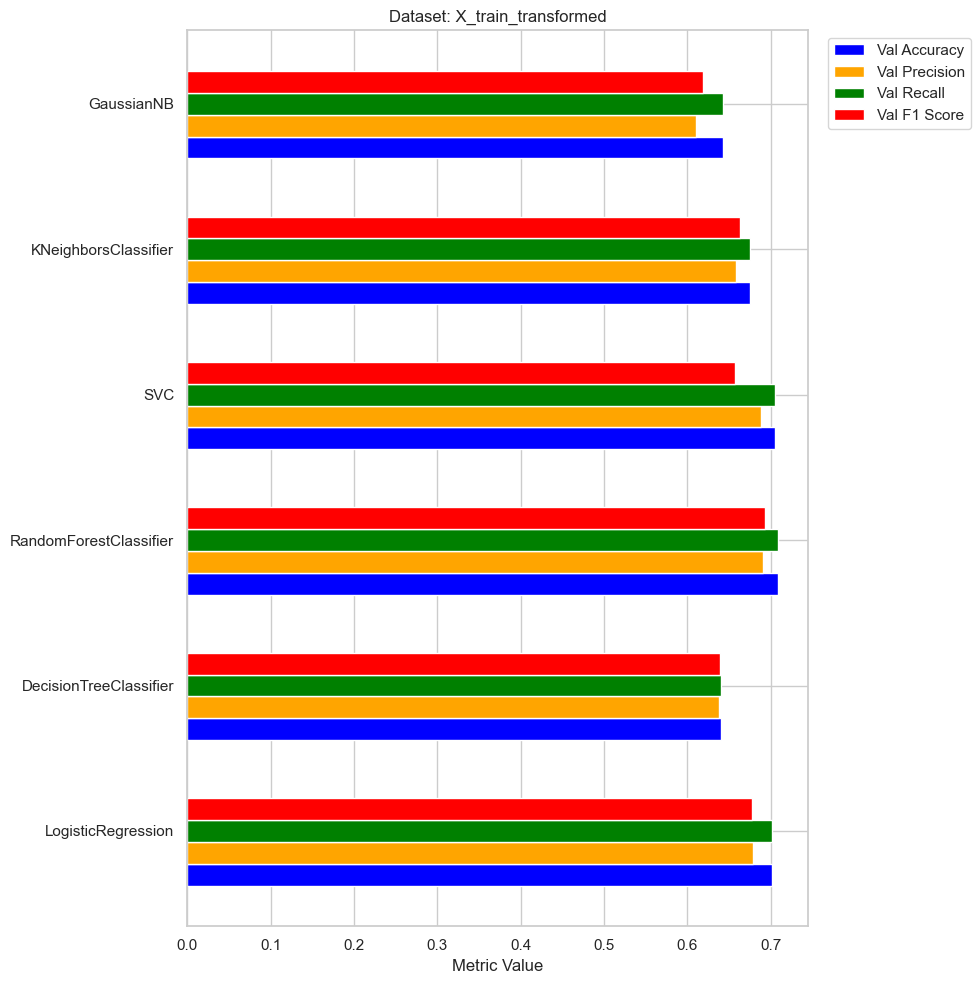

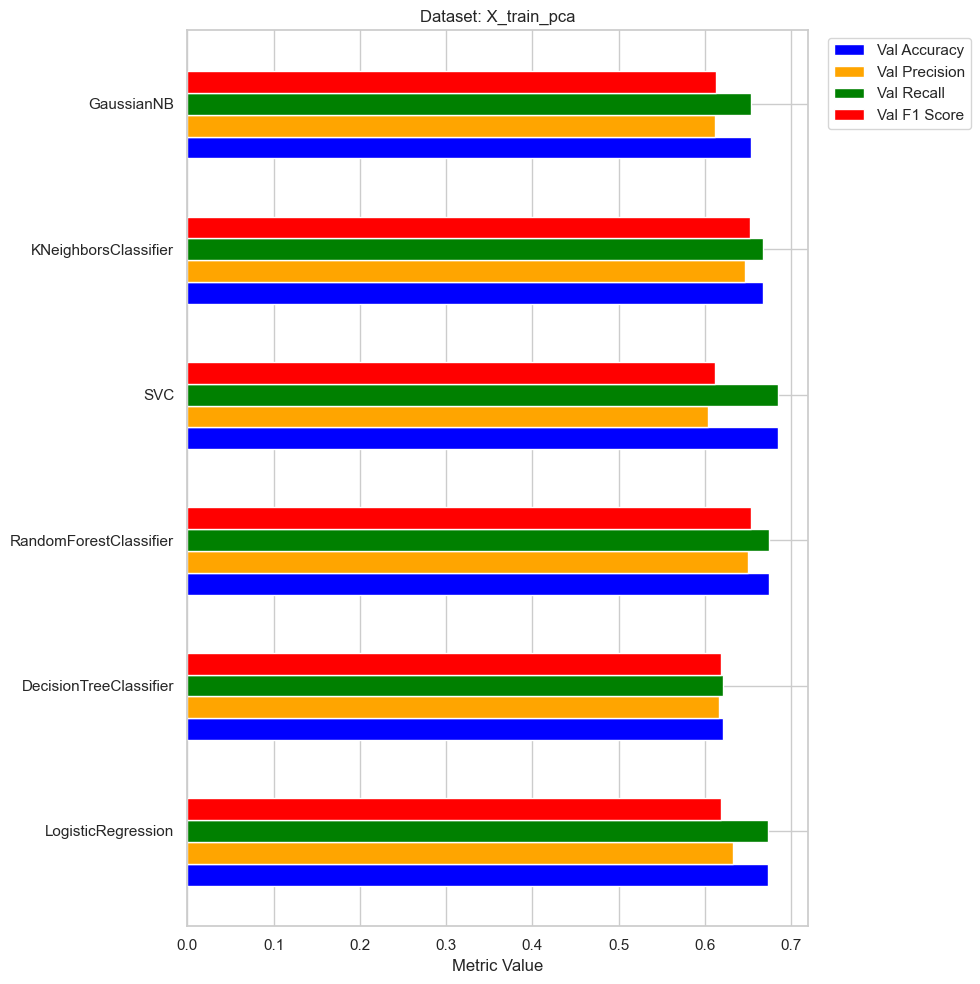

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# separate dataset
noPCA = metrics_df[metrics_df['Dataset'] == 'X_train_transformed']
PCA = metrics_df[metrics_df['Dataset'] == 'X_train_pca']

# figure size
plt.figure(figsize=(10, 10))

# metrics
metrics = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']

# colors
colors = ['blue', 'orange', 'green', 'red']

# positions of the bars on the y-axis
y = np.arange(len(noPCA['Model']))

# height of the bars
height = 0.15

# grouped bars for noPCA
for i, metric in enumerate(metrics):
    plt.barh(y + i*height, dataset_1[metric], height, label=metric, color=colors[i])

# y-axis ticks and labels
plt.yticks(y + height*len(metrics)/2, noPCA['Model'])

# x-axis label 
plt.xlabel('Metric Value')

# legend to the side
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# title 
plt.title('Dataset: X_train_transformed')

# plot
plt.tight_layout()
plt.show()

# figure size for the second plot
plt.figure(figsize=(10, 10))

# positions of the bars on the y-axis second plot
y = np.arange(len(PCA['Model']))

# grouped bars for pca
for i, metric in enumerate(metrics):
    plt.barh(y + i*height, dataset_2[metric], height, label=metric, color=colors[i])

# y-axis ticks and labels 
plt.yticks(y + height*len(metrics)/2, PCA['Model'])

# Sx-axis label second plot
plt.xlabel('Metric Value')

# legend to the side second plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# title second plot
plt.title('Dataset: X_train_pca')

# plot
plt.tight_layout()
plt.show()





In [97]:
# make df
metrics_df = pd.DataFrame(metrics_data)
# drop the first row with NaN values
metrics_df = metrics_df.drop(0)
metrics_df


,Model,Dataset,Val Accuracy,Val Precision,Val Recall,Val F1 Score
1,LogisticRegression,X_train_transformed,0.701495,0.678972,0.701495,0.677338
2,DecisionTreeClassifier,X_train_transformed,0.641062,0.638351,0.641062,0.639654
3,RandomForestClassifier,X_train_transformed,0.709128,0.690761,0.709128,0.692938
4,SVC,X_train_transformed,0.705630,0.688544,0.705630,0.657462
5,KNeighborsClassifier,X_train_transformed,0.675254,0.658478,0.675254,0.663264
6,GaussianNB,X_train_transformed,0.642335,0.610419,0.642335,0.618765
7,LogisticRegression,X_train_pca,0.672551,0.632634,0.672551,0.618531
8,DecisionTreeClassifier,X_train_pca,0.621183,0.615888,0.621183,0.618309
9,RandomForestClassifier,X_train_pca,0.674459,0.649413,0.674459,0.652711
10,SVC,X_train_pca,0.684796,0.603318,0.684796,0.611138


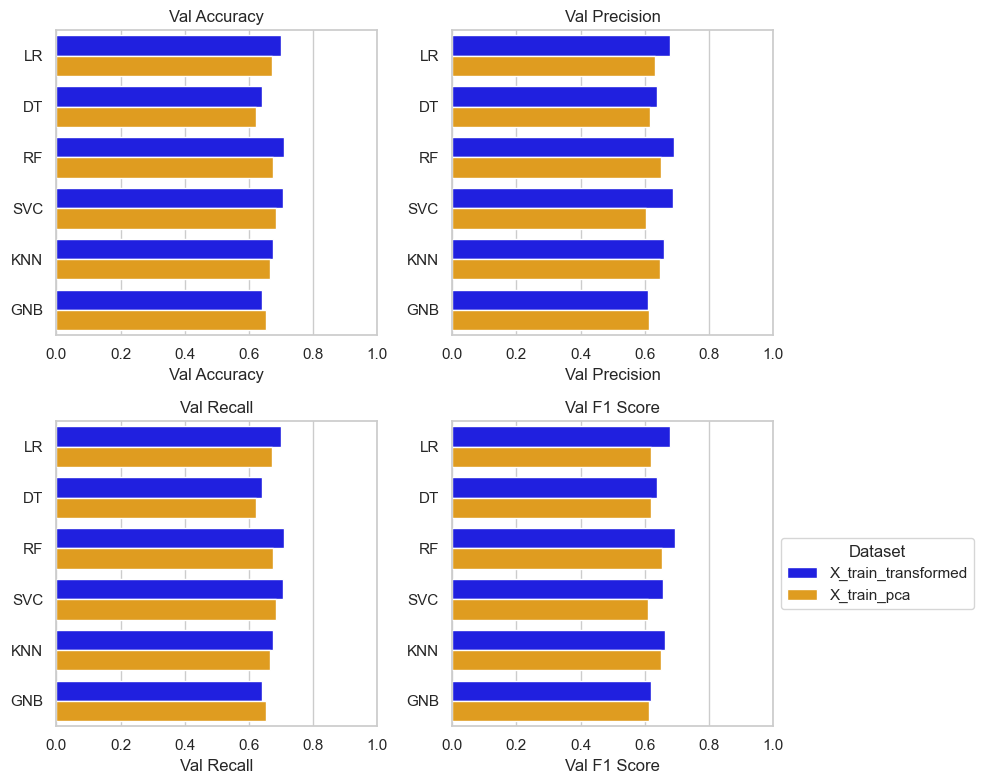

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# abbreviate model names
modified_metrics_df = metrics_df.copy()
modified_metrics_df['Model'] = modified_metrics_df['Model'].replace({
    'LogisticRegression': 'LR',
    'DecisionTreeClassifier': 'DT',
    'RandomForestClassifier': 'RF',
    'SVC': 'SVC',
    'KNeighborsClassifier': 'KNN',
    'GaussianNB': 'GNB'
})

# style
sns.set(style="whitegrid")

# figure size
plt.figure(figsize=(10, 8))

# metrics
metrics = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']

# Spalette
dataset_palette = {'X_train_transformed': 'blue', 'X_train_pca': 'orange'}

# bar plots for each metric
for i, metric in enumerate(metrics):
    # subplot for each metric
    ax = plt.subplot(2, 2, i+1)
    
    # bar plot for each dataset
    sns.barplot(x=metric, y='Model', hue='Dataset', data=modified_metrics_df, palette=dataset_palette, orient='h', ax=ax)
    
    # title
    ax.set_title(metric)
    
    # x-axis label
    ax.set_xlabel(metric)
    
    # remove the y-axis label
    ax.set_ylabel('')
    
    # x-axis limit to 1.0
    ax.set_xlim(0, 1)
    
    # remove the legend from first three plots
    if i < 3:
        ax.get_legend().remove()

# add a legend outside the subplots
plt.legend(title='Dataset', loc='center left', bbox_to_anchor=(1, 0.5))

# tight
plt.tight_layout()

# plot
plt.show()



After much plotting, we have something which will allow us to compare between datasets (PCA and non-PCA) and between models.  I have visualised four performance metrics: 

* **Accuracy** - the proportion of correctly classified samples - that is the overall correctness of the predictions.  This is a simple metric, easy to understand and explain.  However, it can be mislesding if the dataset is imbalanced - e.g. if the classes have different proportions.  
*  **Precision** - proportion of true positive predictions for a specific outcome over the total instances predicted to be that outcome - e.g. total predicted passed students who actually passed over the total predicted passed students.  Precision is useful in multi-class problems as the model's performance can vary for each specific class - thus it tells us about the model's ability to discriminate between different classes and make accurate predictions.  Precision can tell us if the model performs well on a particular outcome and whether it needs improvement for others.
*  **Recall** - proportion of true positive predictions for a specific outcome over the total instances of that outcome - e.g. total predicted passed students who actually passed over the total passed students.  Recall can be helpful where it is important in minimising false negatives - that is where it is important to not miss positive instances.  Recall does not consider false positives, so it may lead to a high number of 'false alarms' or unnecessary action.  In the case of student outcomes, focusing on recall alone as the performance metric might lead to unnecessarily contacting students for intervention, for example. 
*  **F1 score** - this is the harmonic mean of precision and recall, providing a balance between both metrics.  

There is not much difference between the models - none of them are particularly good:

The most accurate model is `RandomForestClassifier` without PCA with an accuracy of 70.9% - that is, it got 70.9% of predictions correct.  It's F1 score was 0.693.  The second most accurate classiifier for this dataset was `Support Vector Classifier` with an accuracy of 70.6% and an F1 score of 0.6657.  

For the PCA transformed data, the SVC was most accuracte with an accuracy of 68.5% and an F1 score of 0.611.  Random Forest classifier was second most accurate with an overall accuracy of 67.4% and a slightly better F1 score of 0.653.  

Logistic Regression was the third best model for both datasets.  

In conclusion, dimension reduced data via PCA transformation does not perform significantly worse than non-PCA transformed data so it may be worth considering PCA.

In [108]:

# confusion matrix 
dataset_name = 'X_train_transformed'
model_name = 'RandomForestClassifier'
confusion_matrix_val = confusion_matrices[(dataset_name, model_name)]
print(f"Confusion Matrix for {dataset_name} - {model_name}:")
print(confusion_matrix_val)




Confusion Matrix for X_train_transformed - RandomForestClassifier:
[[ 238    3  323    1]
 [   2  520  310  549]
 [ 151   86 2118   11]
 [   2  360   31 1583]]


### Fitting Classifiers binary outcomes

#### Refactoring the 'final_result' target variable

In [2]:
# copy the data
y_train_binary = y_train.copy()

# map values to 'intervene' and 'no_intervene'
y_train_binary.replace({'Pass': 'no_intervene', 'Distinction': 'no_intervene',
                        'Withdrawn': 'intervene', 'Fail': 'intervene'}, inplace=True)

y_val_binary = y_val.copy()
y_val_binary.replace({'Pass': 'no_intervene', 'Distinction': 'no_intervene',
                        'Withdrawn': 'intervene', 'Fail': 'intervene'}, inplace=True)


In [6]:
y_val_binary.value_counts()


final_result
intervene       3357
no_intervene    2931
dtype: int64

Redo models with binary outcome

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# models
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

# iterate over the datasets
for dataset_name, X_train, X_val in [('X_train_transformed', X_train_transformed, X_val_transformed),
                                    ('X_train_pca', X_train_pca, X_val_pca)]:
    print(f"Results for {dataset_name}:")
    
    # iterate over the models
    for model in models:
        model_name = type(model).__name__
        print(f"Model: {model_name}")
        
        # fit model on the training data
        model.fit(X_train, y_train_binary.values.ravel())  
        
        # predictions on the validation set
        y_pred_val_binary = model.predict(X_val)
        
        # evaluation metrics on the validation set
        accuracy_val = accuracy_score(y_val_binary, y_pred_val_binary)
        precision_val = precision_score(y_val_binary, y_pred_val_binary, average='weighted', zero_division=0)
        recall_val = recall_score(y_val_binary, y_pred_val_binary, average='weighted', zero_division=0)
        f1_val = f1_score(y_val_binary, y_pred_val_binary, average='weighted', zero_division=0)
        
        print(f"Validation Accuracy: {accuracy_val}")
        print(f"Validation Precision: {precision_val}")
        print(f"Validation Recall: {recall_val}")
        print(f"Validation F1 Score: {f1_val}")
        
        # confusion matrix for the validation set
        confusion_matrix_val_binary = confusion_matrix(y_val_binary, y_pred_val_binary)
        print("Confusion Matrix (Validation Set):")
        print(confusion_matrix_val_binary)
        
        print()



Results for X_train_transformed:
Model: LogisticRegression
Validation Accuracy: 0.9184160305343512
Validation Precision: 0.9206324518592317
Validation Recall: 0.9184160305343512
Validation F1 Score: 0.9185097227087798
Confusion Matrix (Validation Set):
[[2996  361]
 [ 152 2779]]

Model: DecisionTreeClassifier
Validation Accuracy: 0.901558524173028
Validation Precision: 0.9016137033912648
Validation Recall: 0.901558524173028
Validation F1 Score: 0.9015778582910531
Confusion Matrix (Validation Set):
[[3038  319]
 [ 300 2631]]

Model: RandomForestClassifier
Validation Accuracy: 0.9305025445292621
Validation Precision: 0.932639841126152
Validation Recall: 0.9305025445292621
Validation F1 Score: 0.93058227544868
Confusion Matrix (Validation Set):
[[3036  321]
 [ 116 2815]]

Model: SVC
Validation Accuracy: 0.9209605597964376
Validation Precision: 0.9266898173768655
Validation Recall: 0.9209605597964376
Validation F1 Score: 0.9210153677910821
Confusion Matrix (Validation Set):
[[2935  422]
 [

In [124]:
import pandas as pd
import numpy as np

# empty list of dictionaries for metrics data
metrics_data = [
    {
        'Model': '',
        'Dataset': '',
        'Val Accuracy': np.nan,
        'Val Precision': np.nan,
        'Val Recall': np.nan,
        'Val F1 Score': np.nan
    }
]
confusion_matrices = {}

# iterate over the datasets
for dataset_name, X_train, X_val in [('X_train_transformed', X_train_transformed, X_val_transformed),
                                    ('X_train_pca', X_train_pca, X_val_pca)]:
    print(f"\nDataset {dataset_name}:\n")
    
    # iterate over the models
    for model in models:
        model_name = type(model).__name__
        print(f"Saving results for: {model_name}")
        
        # fit model on the training data
        model.fit(X_train, y_train_binary.values.ravel())  
        
        # predictions on the validation set
        y_pred_val_binary = model.predict(X_val)
        
        # evaluation metrics on the validation set
        accuracy_val = accuracy_score(y_val_binary, y_pred_val_binary)
        precision_val = precision_score(y_val_binary, y_pred_val_binary, average='weighted', zero_division=0)
        recall_val = recall_score(y_val_binary, y_pred_val_binary, average='weighted', zero_division=0)
        f1_val = f1_score(y_val_binary, y_pred_val_binary, average='weighted', zero_division=0)
        
        # store metrics 
        metrics_data.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'Val Accuracy': accuracy_val,
            'Val Precision': precision_val,
            'Val Recall': recall_val,
            'Val F1 Score': f1_val
        })
        
        # confusion matrix for the validation set
        confusion_matrix_val_binary = confusion_matrix(y_val_binary, y_pred_val_binary)
        
        # store confusion matrix using dataset and model as keys
        confusion_matrices[(dataset_name, model_name)] = confusion_matrix_val

# metrics df
metrics_binary = pd.DataFrame(metrics_data)



Dataset X_train_transformed:

Saving results for: LogisticRegression
Saving results for: DecisionTreeClassifier
Saving results for: RandomForestClassifier
Saving results for: SVC
Saving results for: KNeighborsClassifier
Saving results for: GaussianNB

Dataset X_train_pca:

Saving results for: LogisticRegression
Saving results for: DecisionTreeClassifier
Saving results for: RandomForestClassifier
Saving results for: SVC
Saving results for: KNeighborsClassifier
Saving results for: GaussianNB


In [125]:

# Print
print("Metrics DataFrame:")
print(metrics_binary)

#print(metrics_df.info())


Metrics DataFrame:
                     Model              Dataset  Val Accuracy  Val Precision  \
0                                                         NaN            NaN   
1       LogisticRegression  X_train_transformed      0.918416       0.920632   
2   DecisionTreeClassifier  X_train_transformed      0.903308       0.903352   
3   RandomForestClassifier  X_train_transformed      0.930980       0.933417   
4                      SVC  X_train_transformed      0.920961       0.926690   
5     KNeighborsClassifier  X_train_transformed      0.917303       0.920162   
6               GaussianNB  X_train_transformed      0.913486       0.916213   
7       LogisticRegression          X_train_pca      0.916667       0.919615   
8   DecisionTreeClassifier          X_train_pca      0.879453       0.879608   
9   RandomForestClassifier          X_train_pca      0.913327       0.915948   
10                     SVC          X_train_pca      0.916508       0.923261   
11    KNeighborsClass

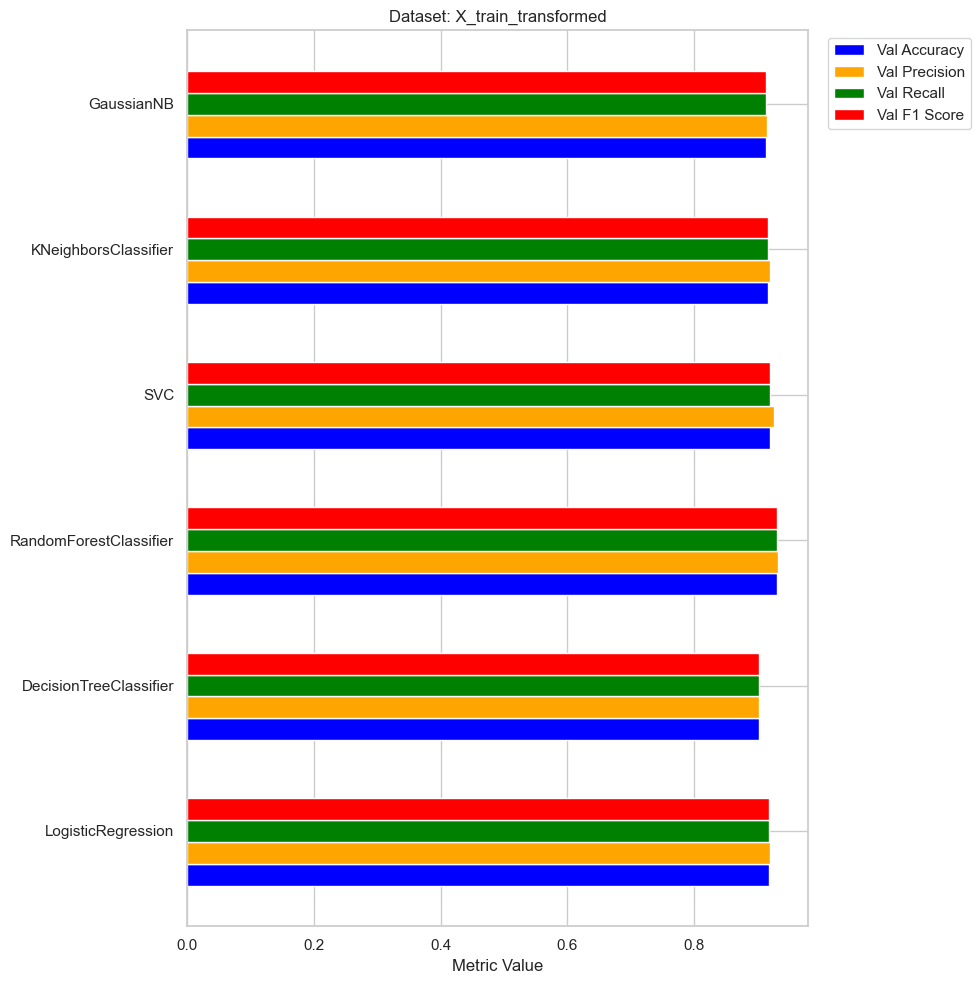

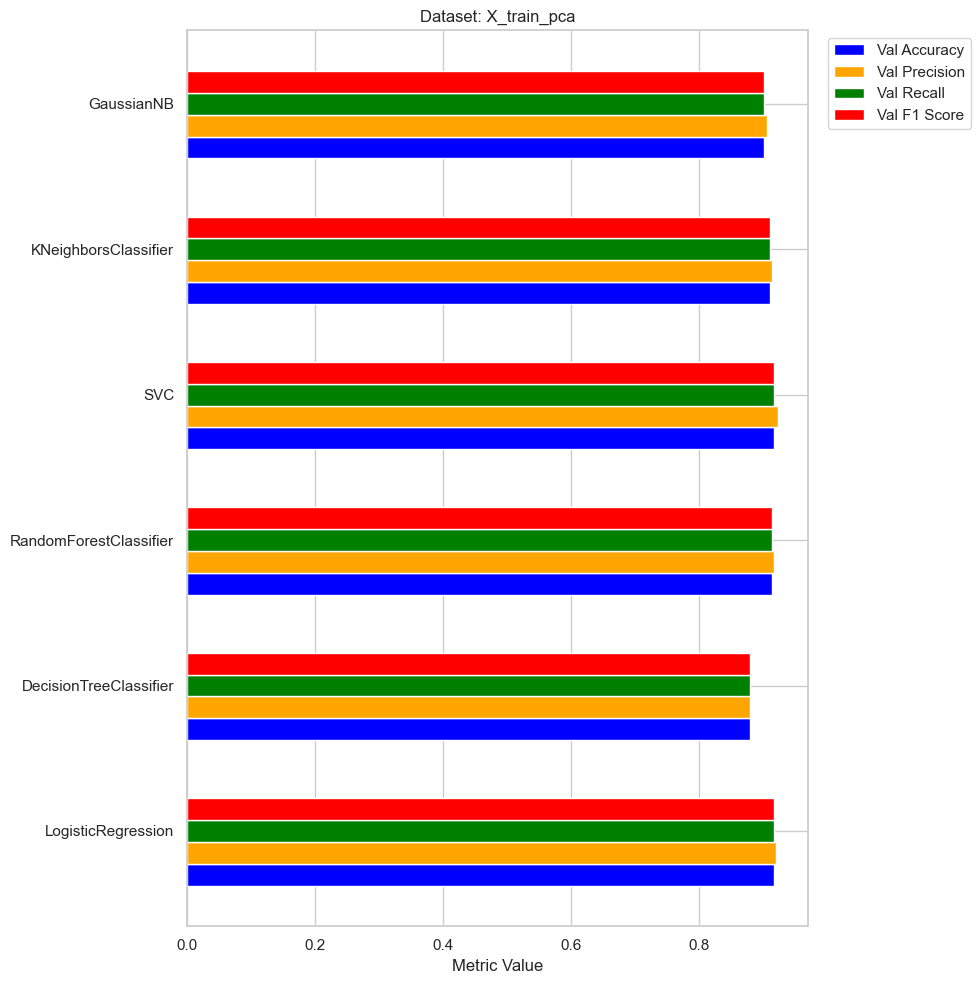

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# separate dataset
noPCA = metrics_binary[metrics_binary['Dataset'] == 'X_train_transformed']
PCA = metrics_binary[metrics_binary['Dataset'] == 'X_train_pca']

# figure size
plt.figure(figsize=(10, 10))

# metrics
metrics = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']

# colors
colors = ['blue', 'orange', 'green', 'red']

# positions of the bars on the y-axis
y = np.arange(len(noPCA['Model']))

# height of the bars
height = 0.15

# grouped bars for noPCA
for i, metric in enumerate(metrics):
    plt.barh(y + i*height, noPCA[metric], height, label=metric, color=colors[i])

# y-axis ticks and labels
plt.yticks(y + height*len(metrics)/2, noPCA['Model'])

# x-axis label 
plt.xlabel('Metric Value')

# legend to the side
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# title 
plt.title('Dataset: X_train_transformed')

# plot
plt.tight_layout()
plt.show()

# figure size for the second plot
plt.figure(figsize=(10, 10))

# positions of the bars on the y-axis second plot
y = np.arange(len(PCA['Model']))

# grouped bars for pca
for i, metric in enumerate(metrics):
    plt.barh(y + i*height, PCA[metric], height, label=metric, color=colors[i])

# y-axis ticks and labels 
plt.yticks(y + height*len(metrics)/2, PCA['Model'])

# Sx-axis label second plot
plt.xlabel('Metric Value')

# legend to the side second plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# title second plot
plt.title('Dataset: X_train_pca')

# plot
plt.tight_layout()
plt.show()





In [130]:
# make df
metrics_binary = pd.DataFrame(metrics_data)
# drop the first row with NaN values
metrics_binary = metrics_df.drop(0)
metrics_binary


,Model,Dataset,Val Accuracy,Val Precision,Val Recall,Val F1 Score
1,LogisticRegression,X_train_transformed,0.918416,0.920632,0.918416,0.918510
2,DecisionTreeClassifier,X_train_transformed,0.901559,0.901575,0.901559,0.901566
3,RandomForestClassifier,X_train_transformed,0.929866,0.932121,0.929866,0.929947
4,SVC,X_train_transformed,0.920961,0.926690,0.920961,0.921015
5,KNeighborsClassifier,X_train_transformed,0.917303,0.920162,0.917303,0.917396
6,GaussianNB,X_train_transformed,0.913486,0.916213,0.913486,0.913584
7,LogisticRegression,X_train_pca,0.916667,0.919615,0.916667,0.916760
8,DecisionTreeClassifier,X_train_pca,0.879135,0.879258,0.879135,0.879174
9,RandomForestClassifier,X_train_pca,0.915394,0.917911,0.915394,0.915491
10,SVC,X_train_pca,0.916508,0.923261,0.916508,0.916545


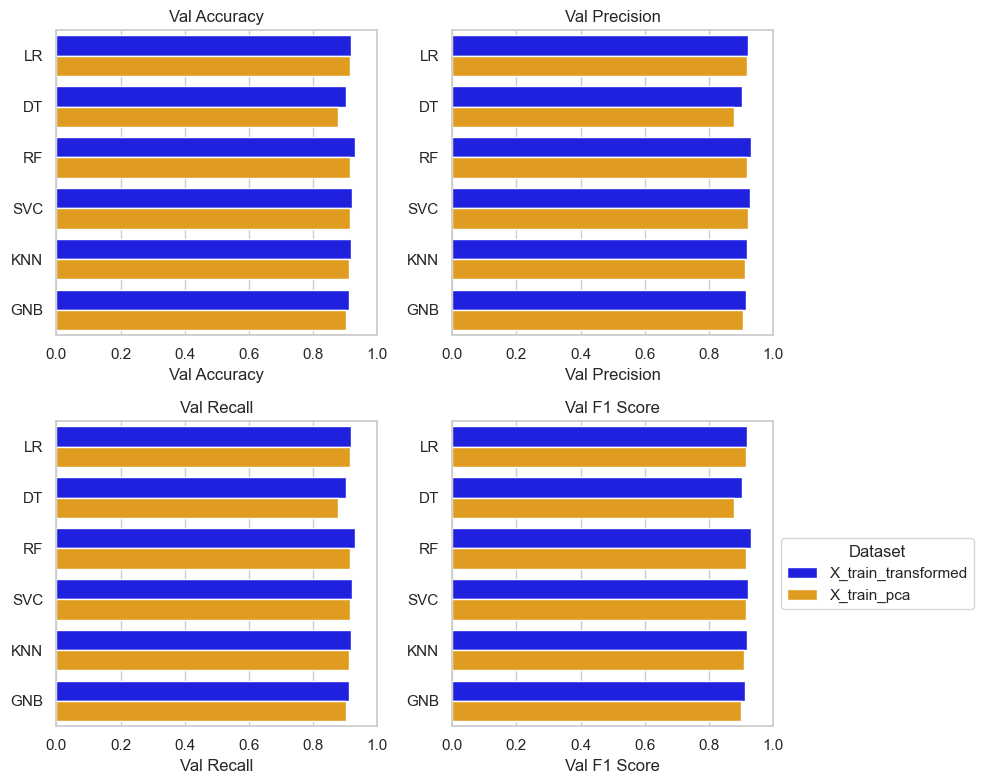

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# abbreviate model names
modified_metrics_binary = metrics_binary.copy()
modified_metrics_binary['Model'] = modified_metrics_binary['Model'].replace({
    'LogisticRegression': 'LR',
    'DecisionTreeClassifier': 'DT',
    'RandomForestClassifier': 'RF',
    'SVC': 'SVC',
    'KNeighborsClassifier': 'KNN',
    'GaussianNB': 'GNB'
})

# style
sns.set(style="whitegrid")

# figure size
plt.figure(figsize=(10, 8))

# metrics
metrics = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']

# Spalette
dataset_palette = {'X_train_transformed': 'blue', 'X_train_pca': 'orange'}

# bar plots for each metric
for i, metric in enumerate(metrics):
    # subplot for each metric
    ax = plt.subplot(2, 2, i+1)
    
    # bar plot for each dataset
    sns.barplot(x=metric, y='Model', hue='Dataset', data=modified_metrics_binary, palette=dataset_palette, orient='h', ax=ax)
    
    # title
    ax.set_title(metric)
    
    # x-axis label
    ax.set_xlabel(metric)
    
    # remove the y-axis label
    ax.set_ylabel('')
    
    # x-axis limit to 1.0
    ax.set_xlim(0, 1)
    
    # remove the legend from first three plots
    if i < 3:
        ax.get_legend().remove()

# add a legend outside the subplots
plt.legend(title='Dataset', loc='center left', bbox_to_anchor=(1, 0.5))

# tight
plt.tight_layout()

# plot
plt.show()



In [132]:

metrics_binary


,Model,Dataset,Val Accuracy,Val Precision,Val Recall,Val F1 Score
1,LogisticRegression,X_train_transformed,0.918416,0.920632,0.918416,0.918510
2,DecisionTreeClassifier,X_train_transformed,0.901559,0.901575,0.901559,0.901566
3,RandomForestClassifier,X_train_transformed,0.929866,0.932121,0.929866,0.929947
4,SVC,X_train_transformed,0.920961,0.926690,0.920961,0.921015
5,KNeighborsClassifier,X_train_transformed,0.917303,0.920162,0.917303,0.917396
6,GaussianNB,X_train_transformed,0.913486,0.916213,0.913486,0.913584
7,LogisticRegression,X_train_pca,0.916667,0.919615,0.916667,0.916760
8,DecisionTreeClassifier,X_train_pca,0.879135,0.879258,0.879135,0.879174
9,RandomForestClassifier,X_train_pca,0.915394,0.917911,0.915394,0.915491
10,SVC,X_train_pca,0.916508,0.923261,0.916508,0.916545


Wow!

Predicting on binary outcomes results in much better performance.  Of course, it is expected - it is much easier to predict one of two outcomes v one of four.  There is also a better balance between the two outcomes in the dataset.

Thinking about the business scenario - being able to identify whether to intervene or not is much more useful than being able to predict the outcome...at least in the first instance.  Being able to identify students who are not likely to continue their studies, either by eventual failure or withdrawal (which arguably is sometimes preempting failure) is the main goal of this model.

For the sake of the student, being able to intervene and potentially put measures in place to allow them to get back on track could have an immense outcome on their studies, prospects, opportunities, and life.  The reasons for their discontinuation may be varied and complicated (financial, personal, academic, circumstantial, health, etc.) but early intervention will allow an institution to ensure that the student gets the best outcome for them.  

For the institution, it is primarily about doing the right thing by the student.  And by doing the right thing, the HE institution also benefits by way of better continuation rates, better retention rates, better outcomes for students, better reputation, better league table positions, better funding, etc.

